In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


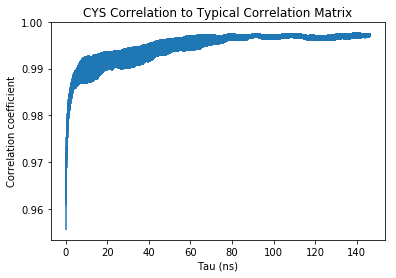

In [4]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('CYS Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cys_prop_max_correlation_to_equaltime.png')

Bars are standard error

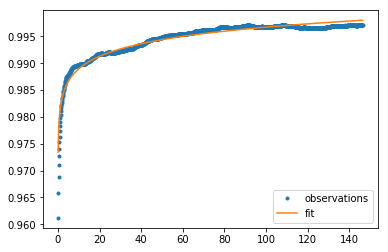

In [5]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.00337298*log(x) + 0.98120613
yhat = 0.00337298*np.log(taus) + 0.98120613
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYS_prop_max_correlation_to_equaltime.png')

$$y = 0.00337298*log(x) + 0.98120613$$

[ -2.12694282e-02  -3.44371984e-01   9.91682076e-01   4.66316310e-05]


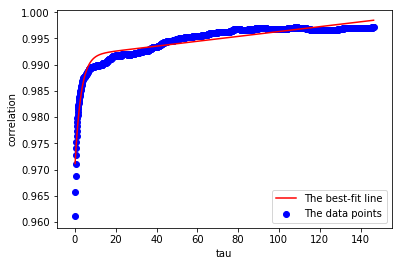

In [9]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(1,0.003,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_CYS_prop_max_correlation_to_equaltime.png')

$$y = -2.12694282\times10^{-2} e^{-3.44371984\times10^{-1}x} + 9.91682076\times10^{-1} e^{4.66316310\times10^{-5}x}$$

[ -2.49675862e-02  -8.98532969e-01   1.00616687e+00  -4.99520530e-05
  -1.87727401e-02  -1.48418036e-02]


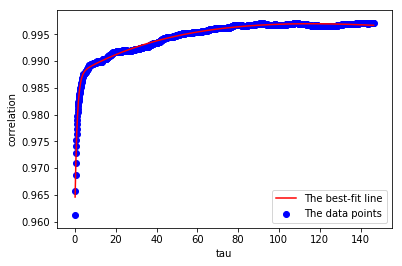

In [11]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-.021,-.34,.99,.000046,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_CYS_prop_max_correlation_to_equaltime.png')

$$y = -2.49675862\times10^{-2} e^{-8.98532969\times10^{-01}x} + 1.00616687 e^{-4.99520530\times10^{-5}x} + -1.87727401\times10^{-2} e^{-1.48418036\times10^{-2}}$$

# Time Lagged

In [13]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

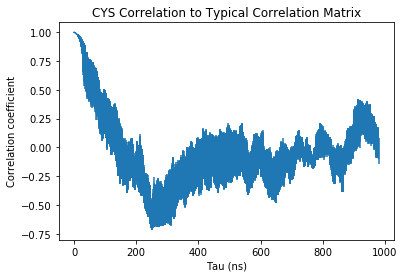

In [14]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('CYS Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cys_TL_correlation_to_equaltime.png')

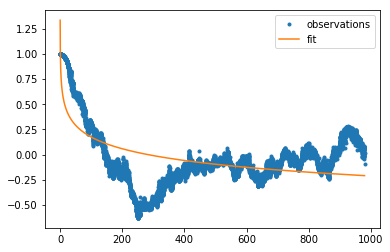

In [15]:
np.polyfit(np.log(TLtaus), TLaverage, 1)
#y = -0.16794694*log(x) + 0.94796496
yhat = -0.16794694*np.log(TLtaus) + 0.94796496
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYS_TL_correlation_to_equaltime.png')

$$y = -0.16794694*log(x) + 0.94796496$$

[  3.90495480e+02  -6.11050395e-03  -3.89200108e+02  -6.08456419e-03]


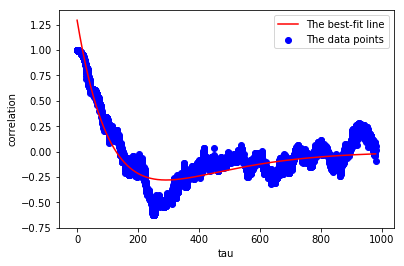

In [16]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_CYS_TL_correlation_to_equaltime.png')

$$y = 3.90495480\times10^{2} e^{-6.11050395\times10^{-3}x} + -3.89200108\times10^{2} e^{-6.08456419\times10^{-3}x}$$

[  2.85112835e+02  -5.85199601e-03  -2.83842870e+02  -5.81780153e-03
   3.50530408e-06   1.13125190e-02]


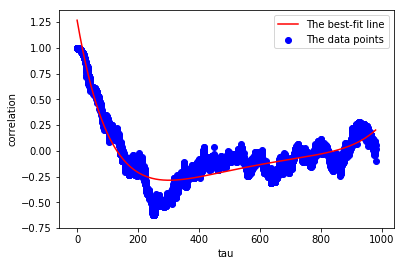

In [18]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_CYS_TL_correlation_to_equaltime.png')

$$y = 2.85112835\times10^{2} e^{-5.85199601\times10^{-3}x} + -2.83842870\times10^{2} e^{-5.8178015\times10^{-3}x} + 3.50530408\times10^{-6} e^{1.13125190\times10^{-2}}$$